In [1]:
import os
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.metrics import mean_squared_error
from scipy import stats

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
## Loading the training data

datasets_dir = os.path.join('artifacts', 'datasets')

X_prepared = np.loadtxt(os.path.join(datasets_dir, "X_prepared.txt"))
Y = pd.read_csv(os.path.join(datasets_dir, "Y.csv"))

### 1. Trying building SVR models with kernels `linear` and `rbf` respectively, hypertuning <br><br>the params `C` and `gamma` using `RandomizedSearchCV`.

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

### stats.expon(): 

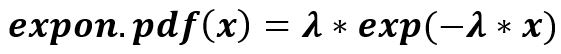
An exponential continuous random variable

In [4]:
 # Random Variates

R = expon.rvs(scale = 1,  size = 10)
print ("Random Variates : \n", R)

Random Variates : 
 [0.16766856 0.28098554 3.13562216 0.05554954 0.94170678 0.78484821
 0.36990949 0.81198212 0.44463585 0.31218199]


In [5]:
quantile = np.arange (0.01, 1, 0.1)

# PDF
R = expon.pdf(quantile, loc = 0, scale = 1)
print ("\nProbability Distribution : \n", R)


Probability Distribution : 
 [0.99004983 0.89583414 0.81058425 0.73344696 0.66365025 0.60049558
 0.54335087 0.4916442  0.44485807 0.40252422]


### stats.reciprocal()

With the help of sympy.stats.Reciprocal() method, we can get the continuous random variable which represents the Reciprocal distribution.

In [6]:
# Import sympy and Reciprocal
from sympy.stats import Reciprocal, density
from sympy import Symbol, pprint
  
z = Symbol("z")
a = Symbol("a", positive = True)
b = Symbol("b", positive = True)
  
# Using sympy.stats.Reciprocal() method
X = Reciprocal("x", a, b)
gfg = density(X)(z)

gfg

1/(z*(-log(a) + log(b)))

In [7]:
z = 0.35
a = 1
b = 2
  
# Using sympy.stats.Reciprocal() method
X = Reciprocal("x", a, b)
gfg = density(X)(z)
  
print(gfg)

2.85714285714286/log(2)


In [8]:
a = 1
b = 2
  
# Using sympy.stats.Reciprocal() method
X = Reciprocal("x", a, b)
gfg = density(X)
  
gfg

ReciprocalDistribution(1, 2)

In [9]:
a = 1
b = 100

X = Reciprocal("x", a, b)

gfg = density(X)(z)
gfg

2.85714285714286/log(100)

### ########################################################################

## # RandomizedSearchCV:

In [10]:
from sklearn.svm import SVR

In [11]:
### Randomized Search CV

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svr_mod = SVR()

In [17]:
## Search for the best

rnd_search = RandomizedSearchCV(svr_mod, param_distributions=param_distribs,
                               n_iter=16, cv=5, verbose=3, scoring='neg_mean_squared_error',
                               random_state=42)
rnd_search.fit(X_prepared, Y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=629.782329591372, gamma=3.010121430917521, kernel=linear;, score=-4867569557.090 total time=  10.1s
[CV 2/5] END C=629.782329591372, gamma=3.010121430917521, kernel=linear;, score=-4709900268.651 total time=   9.7s
[CV 3/5] END C=629.782329591372, gamma=3.010121430917521, kernel=linear;, score=-5016057581.736 total time=   9.7s
[CV 4/5] END C=629.782329591372, gamma=3.010121430917521, kernel=linear;, score=-5375641786.397 total time=  10.3s
[CV 5/5] END C=629.782329591372, gamma=3.010121430917521, kernel=linear;, score=-4838236501.436 total time=   9.4s
[CV 1/5] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf;, score=-4277291557.719 total time=  21.5s
[CV 2/5] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf;, score=-4395660768.133 total time=  29.3s
[CV 3/5] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf;, score=-4310390444.136 total time=  22.8s
[CV 4/5] END C=2629

[CV 1/5] END C=34246.75194632794, gamma=0.3632878599687583, kernel=linear;, score=-4820936345.083 total time=  16.2s
[CV 2/5] END C=34246.75194632794, gamma=0.3632878599687583, kernel=linear;, score=-4713556013.492 total time=  15.9s
[CV 3/5] END C=34246.75194632794, gamma=0.3632878599687583, kernel=linear;, score=-4974723381.429 total time=  18.6s
[CV 4/5] END C=34246.75194632794, gamma=0.3632878599687583, kernel=linear;, score=-5395131624.685 total time=  15.7s
[CV 5/5] END C=34246.75194632794, gamma=0.3632878599687583, kernel=linear;, score=-4792526519.358 total time=  17.2s
[CV 1/5] END C=167.7278956080511, gamma=0.2757870542258224, kernel=rbf;, score=-10241333897.388 total time=  16.7s
[CV 2/5] END C=167.7278956080511, gamma=0.2757870542258224, kernel=rbf;, score=-9999670175.918 total time=  17.3s
[CV 3/5] END C=167.7278956080511, gamma=0.2757870542258224, kernel=rbf;, score=-10376210325.936 total time=  16.4s
[CV 4/5] END C=167.7278956080511, gamma=0.2757870542258224, kernel=rbf;

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=16,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F4451862B0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F44675C520>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

#### => Took way less time than the `GridSearchCV` for the same number of fits.

In [25]:
## best params

rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [20]:
## best score

np.sqrt(-rnd_search.best_score_)

55146.12657185085

#### => Now this is much closer to the performance of the RandomForestRegressor (but not quite there yet offcourse).

In [22]:
## best estimator

final_mod = rnd_search.best_estimator_
final_mod

SVR(C=157055.10989448498, gamma=0.26497040005002437)

In [29]:
## Accuracy of the best estimator (R-squared)

final_mod.score(X_prepared, Y)

0.8255333908464693

=> Pretty darn good!

In [24]:
## saving the best mod
import joblib

models_dir = os.path.join('artifacts', 'models')
os.makedirs(models_dir, exist_ok=True)

joblib.dump(final_mod, open("svr_randomized.pkl", "wb"))

### # Let's have a look at the exponential distribution we've used:

expon(scale=1.0) that we used for hypertuning of `gamma` which palys a vital role in controllling the `rbf` kernel.

#### In probability theory and statistics, a scale parameter is a special kind of numerical parameter of a parametric family of probability distributions. The larger the scale parameter, the more spread out the distribution.

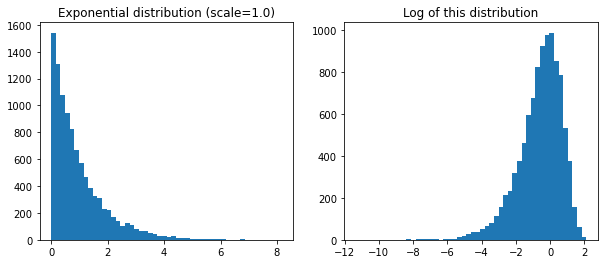

In [26]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)

plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

=> Some samples are much larger or smaller than 1.0, but when we look at the log of the distribution, we can see that most values are actually concentrated roughly in the range of **exp(-2) to exp(+2)**, which is about 0.1 to 7.4.

### # Having a look at the reciprocal distribution we've used:
 reciprocal(20, 200000) that we used for hypertuning of `C`(Regularization parameter)

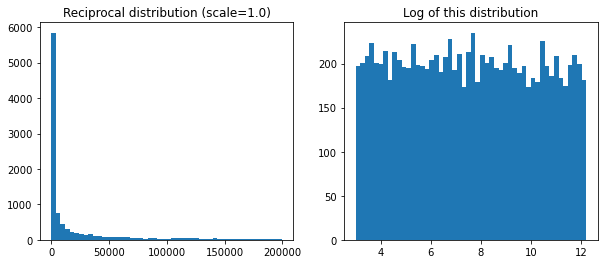

In [28]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)

plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

=> The scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when we don't have a clue of what the target scale is.

**NOTE:** The reciprocal distribution is useful when we have no idea what the scale of the hyperparameter should be (indeed, as we can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when we know (more or less) what the scale of the hyperparameter should be.